<a href="https://colab.research.google.com/github/anuj123upadhyay/genai/blob/main/Data_representation_and_Word_embedding_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bag of word Technique



1.   Corpus
2.   Vocabulary
3.   Document
4.   Word




In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.DataFrame({"text":["people watch dswithanuj",
                         "dswithanuj watch dswithanuj",
                         "people write comment",
                          "dswithanuj write comment"],"output":[1,1,0,0]})

df

,text,output
0,people watch dswithanuj,1
1,dswithanuj watch dswithanuj,1
2,people write comment,0
3,dswithanuj write comment,0


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [12]:
bow = cv.fit_transform(df['text'])

In [14]:
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'dswithanuj': 1, 'write': 4, 'comment': 0}


In [10]:
bow.toarray() #this vector you can pass to the model

array([[0, 1, 1, 1, 0],
       [0, 2, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 0, 1]])

In [11]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())

[[0 1 1 1 0]]
[[0 2 0 1 0]]
[[1 0 1 0 1]]


In [18]:
# new data
cv.transform(['Bappy watch dswithanuj']).toarray()

array([[0, 1, 0, 1, 0]])

In [17]:
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'dswithanuj': 1, 'write': 4, 'comment': 0}


In [19]:
X = bow.toarray() #input
y = df['output'] #output

In [21]:
print(X)
print(y)

[[0 1 1 1 0]
 [0 2 0 1 0]
 [1 0 1 0 1]
 [1 1 0 0 1]]
0    1
1    1
2    0
3    0
Name: output, dtype: int64


# N-grams

### N-gram is also the same technique but here we define the
### N-gram_range = which specify the pair of words as one token.
### Like N-gram_range = 2, then people watch will together coount as 1 token now, okk

In [22]:
df = pd.DataFrame({"text":["people watch dswithanuj",
                         "dswithanuj watch dswithanuj",
                         "people write comment",
                          "dswithanuj write comment"],"output":[1,1,0,0]})

df

,text,output
0,people watch dswithanuj,1
1,dswithanuj watch dswithanuj,1
2,people write comment,0
3,dswithanuj write comment,0


In [23]:
# BI grams
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))

In [24]:
bow = cv.fit_transform(df['text'])


In [25]:
print(cv.vocabulary_)


{'people watch': 2, 'watch dswithanuj': 4, 'dswithanuj watch': 0, 'people write': 3, 'write comment': 5, 'dswithanuj write': 1}


In [27]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())
print(bow[3].toarray())

[[0 0 1 0 1 0]]
[[1 0 0 0 1 0]]
[[0 0 0 1 0 1]]
[[0 1 0 0 0 1]]


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(3,3))

In [29]:
bow = cv.fit_transform(df['text'])


In [30]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())

[[0 0 1 0]]
[[1 0 0 0]]
[[0 0 0 1]]


# TF-IDF (Term frequency- Inverse document frequency)

#### It is not recommended to use Tfidf bcz it doesnot show any semantic meaning or relationship between the data.
#### but it has one advantage as in tfidf there are floating numbers so there is no 0 here.

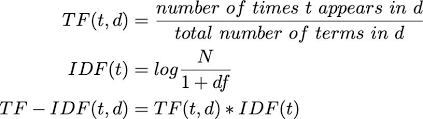

In [31]:
df = pd.DataFrame({"text":["people watch dswithanuj",
                         "dswithanuj watch dswithanuj",
                         "people write comment",
                          "dswithanuj write comment"],"output":[1,1,0,0]})

df

,text,output
0,people watch dswithanuj,1
1,dswithanuj watch dswithanuj,1
2,people write comment,0
3,dswithanuj write comment,0


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid= TfidfVectorizer()

In [33]:
arr = tfid.fit_transform(df['text']).toarray()

In [34]:
arr

array([[0.        , 0.49681612, 0.61366674, 0.61366674, 0.        ],
       [0.        , 0.8508161 , 0.        , 0.52546357, 0.        ],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027],
       [0.61366674, 0.49681612, 0.        , 0.        , 0.61366674]])

In [35]:
print(tfid.idf_)

[1.51082562 1.22314355 1.51082562 1.51082562 1.51082562]
